In [1]:
import numpy as np
from scipy.stats import t
from scipy import stats
from statistics import stdev
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


df = pd.read_csv(r"C:\Users\VICTUS\Downloads\insurance.csv")

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_cat'] = df['bmi'].apply(bmi_category)


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




df['smoker'] = LabelEncoder().fit_transform(df['smoker'])  # yes=1, no=0
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df['bmi_cat'] = LabelEncoder().fit_transform(df['bmi_cat'])


X = df[['age', 'bmi', 'smoker']] 
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("R² Score:", r2_score(y_test, y_pred))

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


R² Score: 0.7567968214396315
  Feature   Coefficient
0     age    258.962431
1     bmi    303.372047
2  smoker  23723.483862


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
 7   bmi_cat   1338 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 68.1+ KB


In [ ]:

fit1 = ols('charges ~ region', data=df).fit()
annova1 = sm.stats.anova_lm(fit1, typ=1)
annova1


,df,sum_sq,mean_sq,F,PR(>F)
region,1.0,7.557128e+06,7.557128e+06,0.051494,0.820518
Residual,1336.0,1.960667e+11,1.467565e+08,NaN,NaN


In [ ]:
tukey1 = pairwise_tukeyhsd(endog=df['charges'], groups=df['region'], alpha=0.05)
tukey1._results_table


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-988.8091,0.7245,-3428.9343,1451.3161,False
0,2,1329.0269,0.4745,-1044.9417,3702.9955,False
0,3,-1059.4471,0.6792,-3499.5723,1380.6781,False
1,2,2317.8361,0.0583,-54.1994,4689.8716,False
1,3,-70.638,0.9999,-2508.8826,2367.6066,False
2,3,-2388.4741,0.0477,-4760.5096,-16.4386,True


In [34]:
fit2 = ols('charges ~ sex', data=df).fit()
annova_sex = sm.stats.anova_lm(fit2, typ=1)
annova_sex


,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,6.435902e+08,6.435902e+08,4.399702,0.036133
Residual,1336.0,1.954306e+11,1.462804e+08,NaN,NaN


In [ ]:
tukey_sex = pairwise_tukeyhsd(endog=df['charges'], groups=df['sex'], alpha=0.05)
tukey_sex._results_table
#0=female
#1=male 


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1387.1723,0.0361,89.8123,2684.5324,True


In [35]:
fit2 = ols('charges ~ smoker', data=df).fit()
annova_smoker = sm.stats.anova_lm(fit2, typ=1)
annova_smoker


,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,1.215199e+11,1.215199e+11,2177.614868,8.271436e-283
Residual,1336.0,7.455432e+10,5.580413e+07,NaN,NaN


In [ ]:
tukey_smoker = pairwise_tukeyhsd(endog=df['charges'], groups=df['smoker'], alpha=0.05)
tukey_smoker._results_table
#0=non-smoker 
#1=smoker

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,23615.9635,0.0,22623.1748,24608.7523,True


In [41]:
fit2 = ols('charges ~ bmi_cat', data=df).fit()
annova_bmi = sm.stats.anova_lm(fit2, typ=1)
annova_bmi

,df,sum_sq,mean_sq,F,PR(>F)
bmi_cat,3.0,7.925371e+09,2.641790e+09,18.73064,6.662798e-12
Residual,1334.0,1.881489e+11,1.410411e+08,NaN,NaN


In [ ]:
tukey_bmi = pairwise_tukeyhsd(endog=df['charges'], groups=df['bmi_cat'], alpha=0.05)
tukey_bmi._results_table

#positive internal means grp 2 pays more than grp 1


group1,group2,meandiff,p-adj,lower,upper,reject
Healthy,Obese,5142.9978,0.0,2804.7161,7481.2795,True
Healthy,Overweight,578.1722,0.938,-1984.1016,3140.446,False
Healthy,Underweight,-1557.1371,0.9433,-8685.1196,5570.8454,False
Obese,Overweight,-4564.8256,0.0,-6498.1136,-2631.5376,True
Obese,Underweight,-6700.1349,0.0622,-13626.93,226.6602,False
Overweight,Underweight,-2135.3093,0.8617,-9140.8911,4870.2724,False


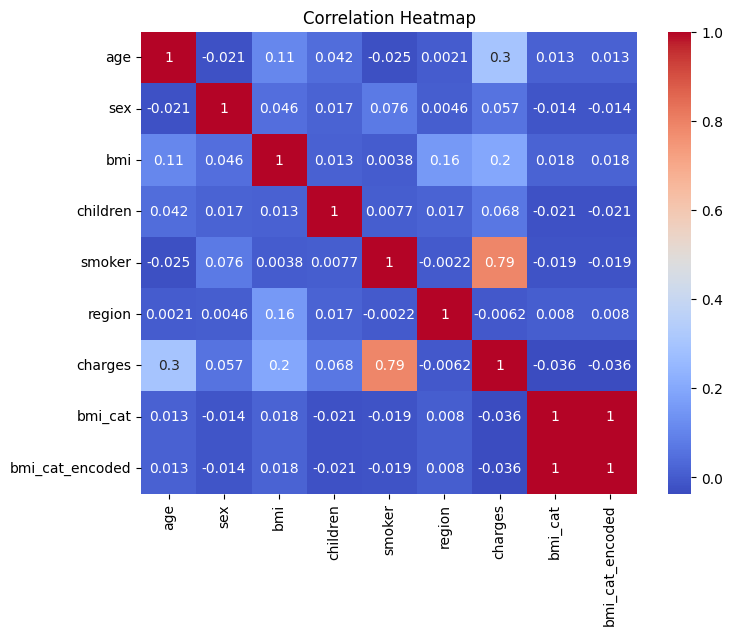

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [61]:
new_data = pd.DataFrame({'age': [40], 'bmi': [25], 'smoker': [1]})
predicted_charge = model.predict(new_data)
print("Predicted Charges:", predicted_charge[0])

Predicted Charges: 30613.514327823617


In [ ]:
from sklearn. import LabelEncoder

ModuleNotFoundError: No module named 'sklearn.stats'

In [63]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_cat,bmi_cat_encoded
0,19,0,27.900,0,1,3,16884.92400,2,2
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,0,0
4,32,1,28.880,0,0,1,3866.85520,2,2
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1,1
1334,18,0,31.920,0,0,0,2205.98080,1,1
1335,18,0,36.850,0,0,2,1629.83350,1,1
1336,21,0,25.800,0,0,3,2007.94500,2,2


In [ ]:
df.iloc[

,age,sex,bmi,children,smoker,region,charges,bmi_cat,bmi_cat_encoded
0,19,0,27.900,0,1,3,16884.92400,2,2
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,0,0
4,32,1,28.880,0,0,1,3866.85520,2,2
...,...,...,...,...,...,...,...,...,...
1331,23,0,33.400,0,0,3,10795.93733,1,1
1332,52,0,44.700,3,0,3,11411.68500,1,1
1333,50,1,30.970,3,0,1,10600.54830,1,1
1334,18,0,31.920,0,0,0,2205.98080,1,1
